In [10]:
import sklearn.datasets as skd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from parameter import Parameters
from functions import sigmoid, sigmoid_derivative, BCE_to_sigmoid_derivative
from recursive_mlp import MLP

In [12]:
def plot_decision_regions(X, t, clf=[], size=(8,6)):
    """Plot the data set (X,t) together with the decision boundary of the classifier clf"""
    # The region of the plane to consider determined by X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Make a make of the whole region
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # have to transpose because the whole algorithm is working transposed
    Z = clf.predict((np.c_[xx.ravel(), yy.ravel()]).T).T

    # Classify each meshpoint.
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=size) # You may adjust this

    # Put the result into a color plot
    plt.contourf(xx, yy, Z, alpha=0.2, cmap = 'Paired')

    plt.scatter(X[:,0], X[:,1], c=t, s=10.0, cmap='Paired')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision regions")
    plt.xlabel("x0")
    plt.ylabel("x1")

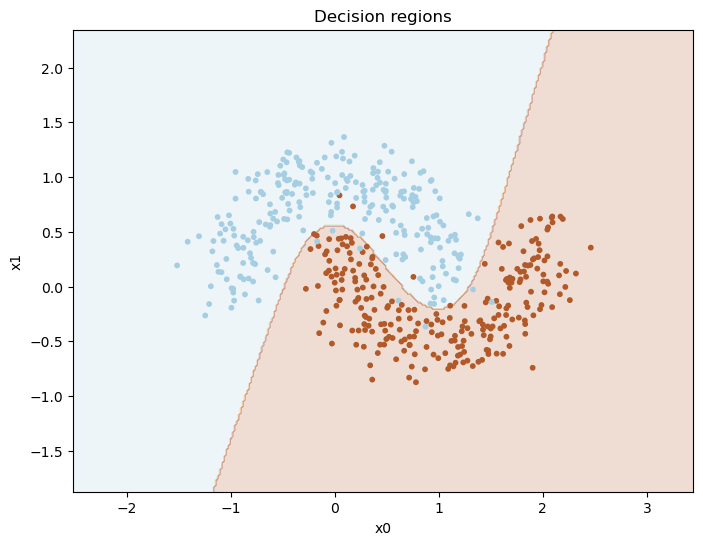

In [16]:
p = Parameters(sigmoid, sigmoid_derivative, BCE_to_sigmoid_derivative)
m = MLP()

m.add((2,3), p)
m.add((3,4), p)
m.add((4,1), p)

# X1, t1 = skd.make_blobs(n_samples=100, n_features=2, centers=2)
X1, t1 = skd.make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=40)

# have to transpose because the whole algorithm is working transposed
m.fit(X1.T, t1)

X2, t2 = skd.make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=40)

plot_decision_regions(X2, t2, clf=m)
